# Artificial Intelligence generated views on the Black-Litterman model

## Import rquired packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Graph Formatting

In [2]:
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

SMALL_SIZE = 14; MEDIUM_SIZE = 16; BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(10,6))         # size fo the graph

## Import the data

Categories construction: Assigns each NYSE, AMEX, and NASDAQ stock to an industry portfolio at the end of June of year t based on its four-digit SIC code at that time. (Uses Compustat SIC codes for the fiscal year ending in calendar year t-1. Whenever Compustat SIC codes are not available, uses CRSP SIC codes for June of year t.) Then computes returns from July of t to June of t+1
 
 1. NoDur  Consumer Nondurables -- Food, Tobacco, Textiles, Apparel, Leather, Toys
 2. Durbl  Consumer Durables -- Cars, TVs, Furniture, Household Appliances
 3. Manuf  Manufacturing -- Machinery, Trucks, Planes, Chemicals, Off Furn, Paper, Com Printing
 4. Enrgy  Oil, Gas, and Coal Extraction and Products
 5. HiTec  Business Equipment -- Computers, Software, and Electronic Equipment
 6. Telcm  Telephone and Television Transmission
 7. Shops  Wholesale, Retail, and Some Services (Laundries, Repair Shops)
 8. Hlth   Healthcare, Medical Equipment, and Drugs
 9. Utils  Utilities
 10. Other -- Other Mines, Constr, BldMt, Trans, Hotels, Bus Serv, Entertainment, Finance

Source: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_10_ind_port.html

In [3]:
raw = pd.read_csv("10_Industry_Portfolios.CSV", header=0, index_col=0, na_values=-99.99)/100
raw.index = pd.to_datetime(raw.index, format="%Y%m").to_period('M')

In [4]:
split = int(len(raw) * 0.9)
train = raw.iloc[:split].copy()
test = raw.iloc[split:].copy()

In [5]:
train.tail()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
2010-12,0.0437,0.0854,0.0701,0.0937,0.0605,0.0671,0.0326,0.0541,0.0322,0.0973
2011-01,-0.0235,0.0048,0.0283,0.0693,0.0392,0.0005,-0.0088,-0.0071,0.0223,0.0198
2011-02,0.0486,-0.0140,0.0343,0.0765,0.0231,0.0759,0.0227,0.0333,0.0243,0.0267
2011-03,0.0305,0.0173,0.0184,0.0191,-0.0159,0.0177,0.0110,0.0230,0.0091,-0.0086
2011-04,0.0459,0.0222,0.0299,0.0130,0.0311,0.0341,0.0453,0.0638,0.0399,0.0111


## Explore the data

In [6]:
train.describe()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,0.009753,0.011089,0.010327,0.010836,0.010952,0.008467,0.009976,0.010722,0.008832,0.008984
std,0.046949,0.078050,0.063852,0.061157,0.074352,0.046652,0.059711,0.056930,0.056646,0.065633
min,-0.246900,-0.348000,-0.298200,-0.298400,-0.338700,-0.215600,-0.302400,-0.340800,-0.330500,-0.300300
25%,-0.014075,-0.027575,-0.020700,-0.023175,-0.028075,-0.013700,-0.021500,-0.019750,-0.016900,-0.021450
50%,0.011000,0.010550,0.014000,0.009050,0.012900,0.009150,0.011300,0.010900,0.010500,0.012550
75%,0.036775,0.048475,0.043300,0.046475,0.050775,0.032100,0.041700,0.041050,0.036375,0.042600
max,0.341700,0.797900,0.572000,0.389900,0.534900,0.281700,0.424500,0.371300,0.434600,0.587500


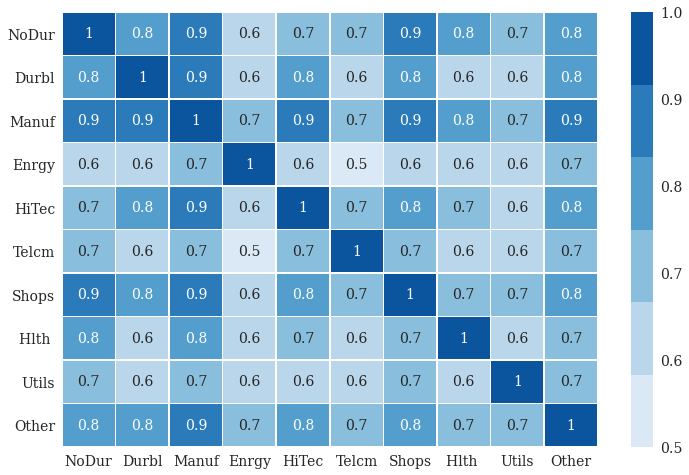

In [34]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(train.corr().round(1), cmap=sns.color_palette('Blues'), annot=True, linewidths=.5, ax=ax);

## Basic Calculations

In [8]:
# Initial Weights
ind = len(train.columns)
eq_w = ind * [1 / ind]

#Risk Free
rf = 0.01

def calculate_return(weights):
    return np.dot(train.mean(), weights) * 252

def calculate_std_dev(weights):
    return math.sqrt(np.dot(weights, np.dot(train.cov(), weights)) * 252)

def calculate_sharpe(weights):
    return (calculate_return(weights) - rf) / calculate_std_dev(weights)

In [9]:
calculate_return(eq_w)

2.518487504911592

In [10]:
calculate_std_dev(eq_w)

0.8405024433355057

In [11]:
calculate_sharpe(eq_w)

2.9845094738294202